# ML/DL for Everyone

### 출처

- 모두를 위한 딥러닝 시즌2
- 링크: [모두를 위한 딥러닝 시즌2](https://www.youtube.com/watch?v=7eldOrjQVi0&list=PLQ28Nx3M4Jrguyuwg4xe9d9t2XE639e5C)

<br/>

<hr/>

## Weight initialization

<br/>

<hr/>

### Weight 초기화의 중요성

<br/>

#### Geoffrey Hinton’s summary of findings up to today

- We initialized the weights in a stupid way.
- Weight 초기화가 굉장히 중요함에도 불구하고, 그 이전까지는 무작위로 할당해버렸기 때문이다.

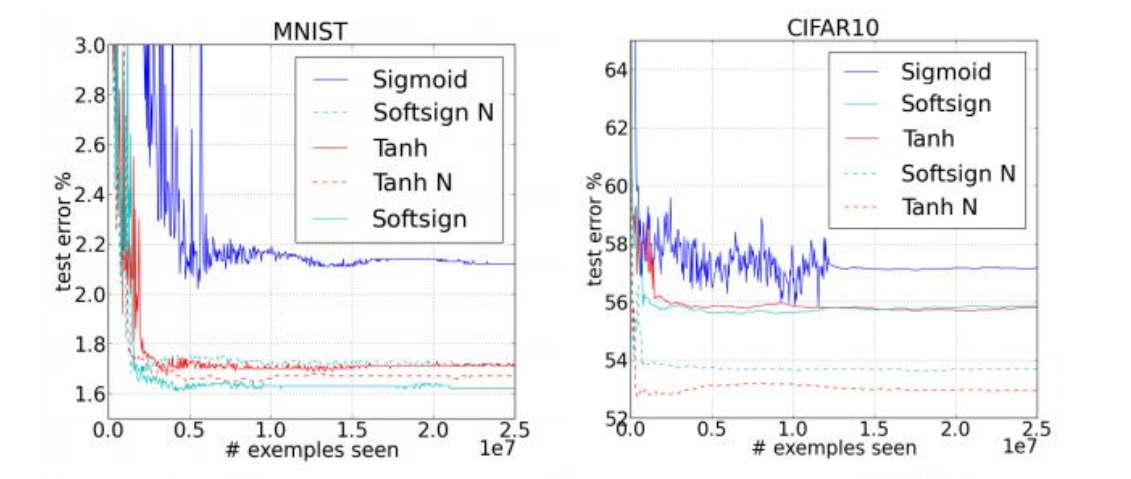

뒤에 **N**이 붙은 분류가 weight initialization 방식을 적용한 것이다. 그 이외의 것들은 기존 방식인 무작위 할당 방식이다.<br/>
그래프를 확인해보면, 확실히 weight initialization 방식을 적용한 것이 훨씬 학습도 잘 되고 성능이 뛰어나다는 것을 확인할 수 있다.

<br/>

<hr/>

### Weight Initialization의 방법?

<br/>

- '0'으로 초기화하지 않는다. (역전파 과정에서 gradient를 0으로 만들어 학습을 무력화시키기 때문이다.)
- 적절한 값을 찾는 것이 굉장히 어려운 일이다.....

<br/>

#### RBM(Restricted Boltzmann Machine)

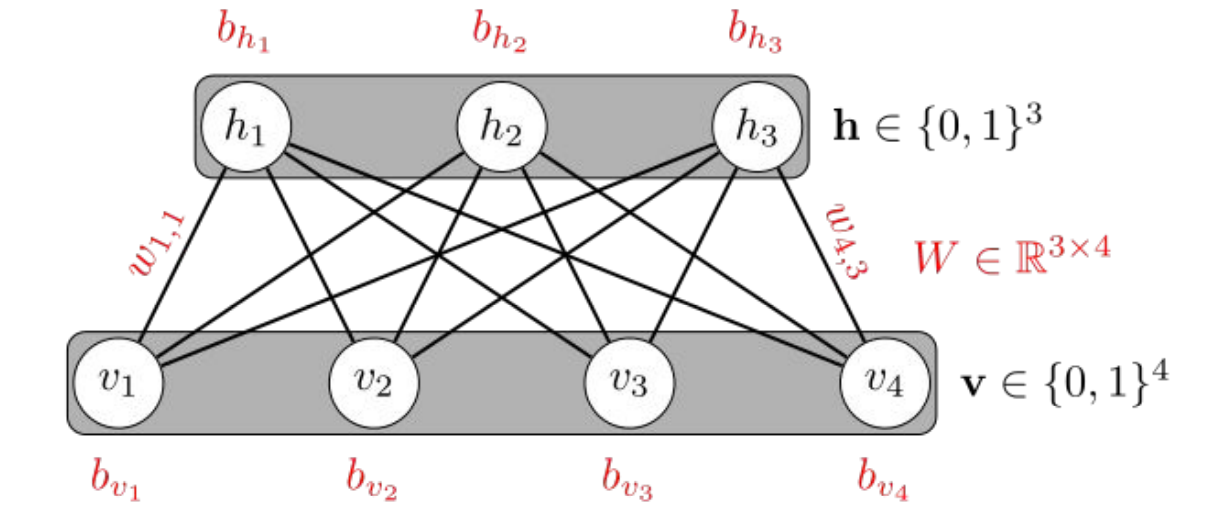

- 여기서 'Restricted'란 같은 layer 안에서는 연결이 없다는 의미이다.
- 다만, 다른 layer 사이에는 모든 노드가 서로 연결(fully connected)되어 있는 형태이다.

<br/>

#### RBM to initialize weights

- **Pre-training** 프로세스를 사용한다.

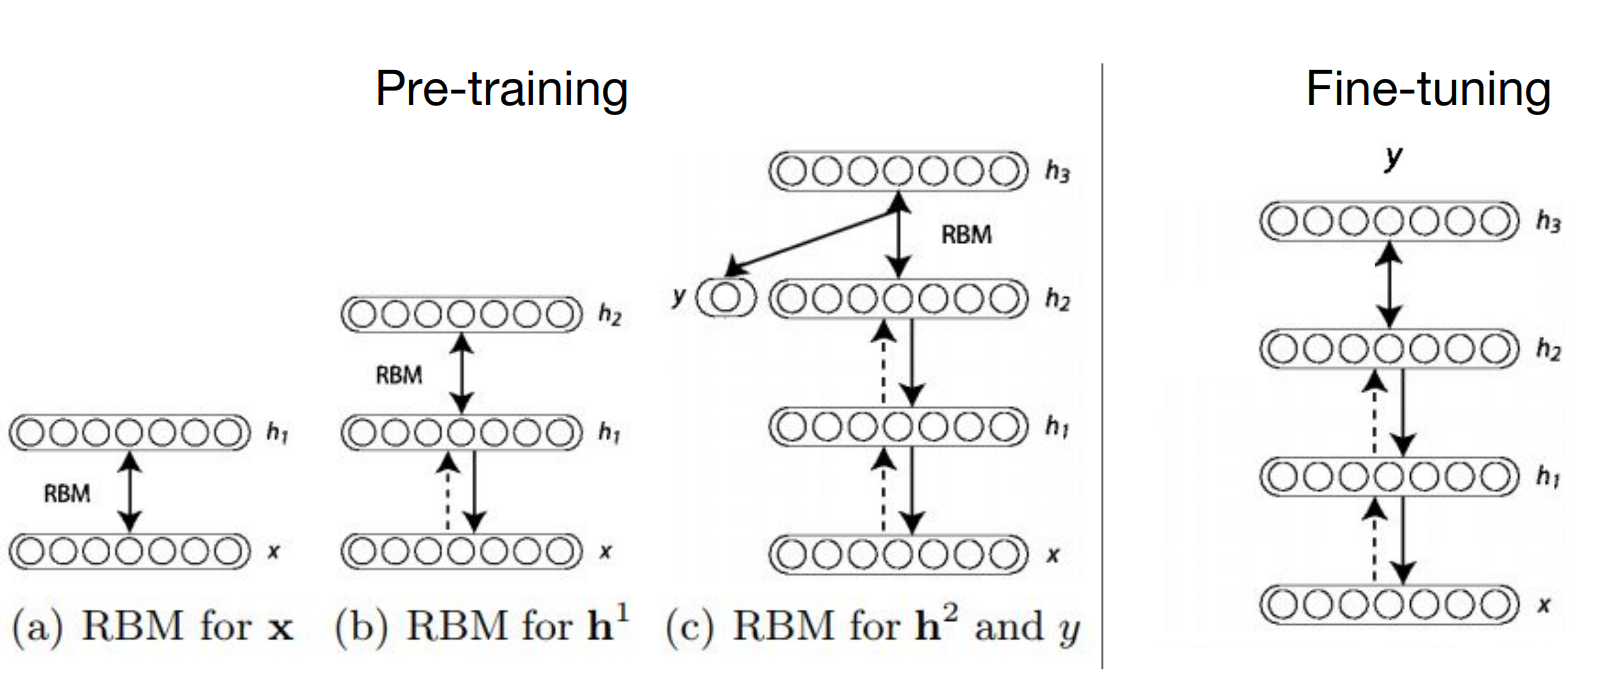

- 위 그림의 **Pre-training** 과정
    1. input X가 들어갔을 때, output Y가 출력됨
    2. output Y를 다시 backward시켜 X'로 X를 복원시킴
    3. 2개 layer의 RBM 학습 끝나면 layer 한 개를 더 쌓아 학습을 진행한다.
    4. 기존 x와 h1 사이의 weight는 고정(fix)한다.
    5. input X가 들어갔을 때, output Y가 출력하고 Y를 backward해 X'를 만든다.
    6. 위 과정을 반복한다.

<br/>

- **RBM 방식은 요즘엔 거의 사용하지 않는다**
    
<br/>    

<hr/>

### Xavier initialization & He initialization

<br/>

- 간단하게 할 수 있는 방법
- layer의 특성에 따라 다르게 weight를 초기화하는 방법

<br/><br/>

#### Xavier

- Xavier Normal initialization
    - 평균이 0, 표준편차는 $Var(W)$인 수식을 이용해 초기화 진행

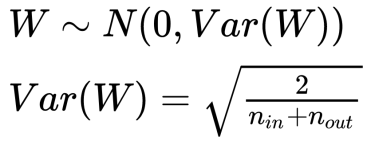

<br/>

- Xavier Uniform initialization
    - 아래 수식을 이용해 초기화

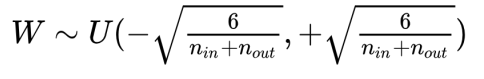

<br/><br/>

#### He

- Xavier과 거의 비슷한데, $n_{out}$이 빠진 것과 동일하다.

<br/>

- He Normal initialization
    - 평균이 0, 표준편차는 $Var(W)$인 수식을 이용해 초기화 진행

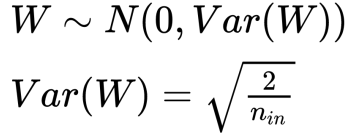

<br/>

- He Uniform initialization
    - 아래 수식을 이용해 초기화

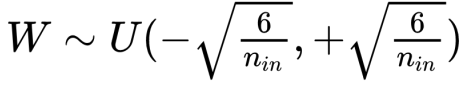

<br/>

<hr/>

### MINST NN Xavier

- Xavier는 torch.nn.init.xavier_uniform을 통해 사용할 수 있다.
- Xavier를 사용한 것의 정확도가 더 높다.

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

# nn layers
linear1 = torch.nn.Linear(784, 256, bias=True)
linear2 = torch.nn.Linear(256, 256, bias=True)
linear3 = torch.nn.Linear(256, 10, bias=True)
relu = torch.nn.ReLU()

# xavier initialization
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)

# model
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [4]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.246791124
Epoch: 0002 cost = 0.092913955
Epoch: 0003 cost = 0.061442938
Epoch: 0004 cost = 0.043496497
Epoch: 0005 cost = 0.033706333
Epoch: 0006 cost = 0.026192287
Epoch: 0007 cost = 0.020151222
Epoch: 0008 cost = 0.018041898
Epoch: 0009 cost = 0.014018491
Epoch: 0010 cost = 0.016260060
Epoch: 0011 cost = 0.011643999
Epoch: 0012 cost = 0.011576372
Epoch: 0013 cost = 0.013942678
Epoch: 0014 cost = 0.010401826
Epoch: 0015 cost = 0.006597922
Learning finished


In [5]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

Accuracy: 0.979699969291687
Label:  8
Prediction:  8


C:\Users\ghpmc\anaconda3\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\ghpmc\anaconda3\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


<br/>

<hr/>

### MNIST nn_deep Xavier

In [6]:
# nn layers
linear1 = torch.nn.Linear(784, 512, bias=True)
linear2 = torch.nn.Linear(512, 512, bias=True)
linear3 = torch.nn.Linear(512, 512, bias=True)
linear4 = torch.nn.Linear(512, 512, bias=True)
linear5 = torch.nn.Linear(512, 10, bias=True)
relu = torch.nn.ReLU()

# xavier initialization
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)
torch.nn.init.xavier_uniform_(linear4.weight)
torch.nn.init.xavier_uniform_(linear5.weight)

# model
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [7]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.283415258
Epoch: 0002 cost = 0.088225596
Epoch: 0003 cost = 0.055175819
Epoch: 0004 cost = 0.039953131
Epoch: 0005 cost = 0.029532226
Epoch: 0006 cost = 0.024759080
Epoch: 0007 cost = 0.018288003
Epoch: 0008 cost = 0.021761587
Epoch: 0009 cost = 0.014244190
Epoch: 0010 cost = 0.015585241
Epoch: 0011 cost = 0.012408455
Epoch: 0012 cost = 0.011710256
Epoch: 0013 cost = 0.011636159
Epoch: 0014 cost = 0.010336065
Epoch: 0015 cost = 0.008786981
Learning finished


In [ ]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())